## Graph RNN : Generationg Realistic Graphs
  - Idea : RNN과 동일하게, 순차적으로 Node와 Edge를 추가하면서 Graph를 생성한다. 
  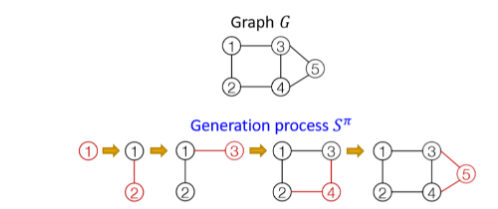
  - Graph G의 Node 순서를 $\pi$라고 했을  각 Node 별 Edge 연결정보 Sequence $S^{\pi}$를 사용한다. 이 벡터에 순차적으로 원소가 들어갔음을 명심하자.
  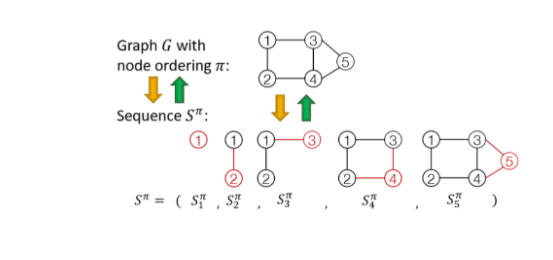
  - Sequence $S^{\pi}$는 2개의 level로 나눈다.
      - Node-level : Node를 하나 추가한다.
      - Edge-level : 기존 Node와 현재 Node를 연결하는 Edge를 그린다.
  - Each Node-level step is an edge-level sequence
  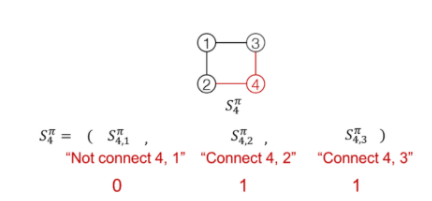
  - summary : A graph + a node ordering = A sequence of sequences
  - Node ordering is randeomly selected (we will come back to this)
  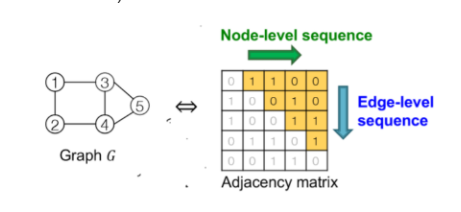
  - sequence 를 사용하는 이유 : node의 순서정보를 지킴으로써 그래프의 구조정보가 유지됨.

### Graph RNN : two levels of RNN
  - Node-level RNN : 각 Edge-level RNN의 initial state를 생성한다.
  - Edge-level RNN : initial state로부터 새로 Node의 Edge를 생성한다.
  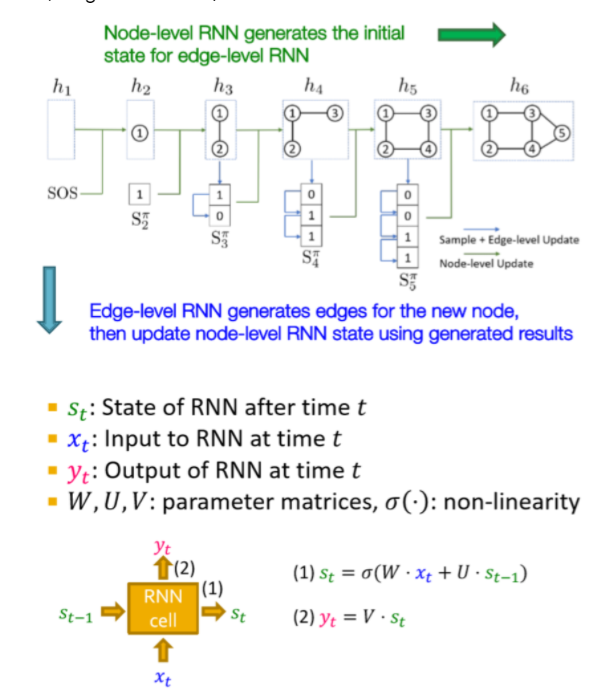
  - 다음 step의 input은 현재 step의 output : $x_{t + 1} = y_t$
  - How to initialize $s_0,x_1$ and when to stop generation : SOS, EOS토큰이 사용된다 (Zero init.)
  - 그러나, Model이 너무 잘 학습한다면 똑같은 Graph를 계속 찍어낸다는 문제점이 있다
  
### Solution : NN을 수정하여 Output을 Edge연결 여부 그 자체가 아닌, 확률 정보를 출력하도록 만듬.
  - 위의 계산식을 보면 확률값을 사용하는 것을 알수  있음
  - Let $y_t = P_{model}(x_t|x_1,...,x_{t-1};\theta)$
  - Then, $x_{t+1}$ is a sample from $y_t : x_{t+1}$ ~ $ y_t$
  - $y_t$가 베르누이 분포를 따른다고 할때,
  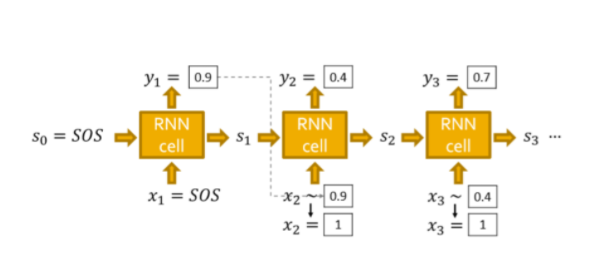
  
  #### Training the model
      - We observe a sequence $y^*$ of edges [1,0,...]
      - Principle : Teacher Forcing -- Replace input and output by the real sequence
      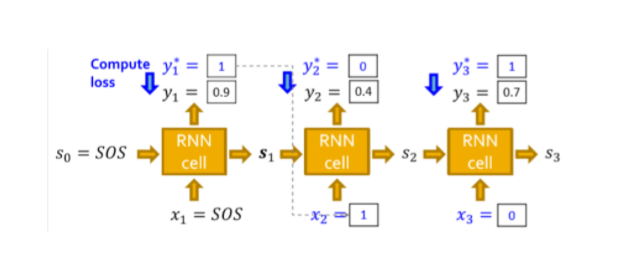
      
      - Loss L : Binary cross entropy
          - Minimize: $ L = -[y_1^*log(y_1) + (1- y_1^*)log(l-y_1)]$
          - 실제값=1이면  왼쪽 항을 최소화한다. 즉 $y_1$을 최대화.
          - 실제값=0이면 오른쪽 항을 최소화한다. 즉 $y_1$을 최소화.
          - This way, $y_1$ is fitting the data samples $y_1^*$
          - Reminder : $y_1$ is computed by RNN, this loss will adjust RNN parameters accordingly, using back propagation

### Issue : Tractability
  - 어떤 노드는 이전의 모든 노드와 연결될수 있다.(Too many steps for edge generation 발생)
  - sol) 너비우선탐색 알고리즘으로 해결
  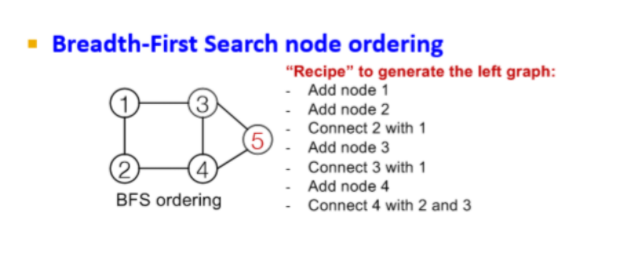
  -  Node 4는 Node 1과 연결되지 않는다.
  - 우리는 Node 1의 모든 이웃이 연결되었음을 이미 알고있다.
  - 그러므로 앞으로도 Node 5, 그리고 이 이후로도 Node 1은 절대로 연결되지 않는다.
  - 우리는 이전 2 step까지의 기억만 가지고도 그래프를 완성할 수 있다. ( 기존에는 n-1 step까지 기억해야 했다)
  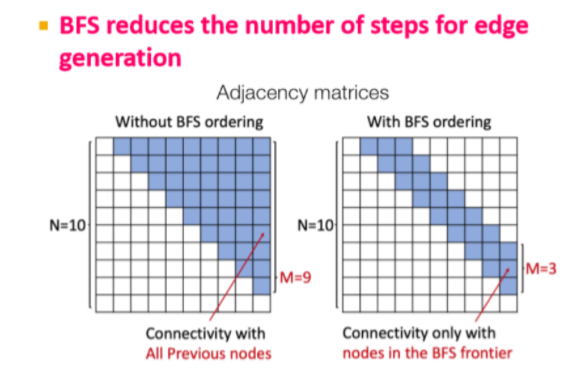
  - 너비우선탐색을 적용한 결과 Node ordering과 edge generation 둘 다 획기적으로 시간복잡도가 줄었다.

## Evaluationg Generated Graphs
  - Task : Compare twi sets of graphs
  - Goal: Define similarity metrics for graphs
  - But Graph isomorphism test is NP
  - Solution
      - Visual similarity
      <img src = 'attachment:image-10.png' width = 40%>
      - Graph statistics similarity
  - 강의에서 기존 Kronecker포함 다른 모델보다 GraphRNN의 우수하다고 강조했다.